# Helper Methods

In [1]:
import numpy as np

# outlier removal method: IQR
# returns list without outliers
# http://colingorrie.github.io/outlier-detection.html
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
def remove_outliers_iqr(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    cut_off = (iqr * 1.5)
    lower_bound = quartile_1 - cut_off
    upper_bound = quartile_3 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower_bound and x <= upper_bound]
    print('Non-outlier observations: %d' % len(outliers_removed))
    return outliers_removed

# annotates plt with y values
def plot_annotate(plt,xvalues,yvalues):
    for i,j in zip(xvalues, yvalues):
        plt.annotate(str(np.round(j,1)),xy=(i-0.15,j))
        
def autolabel_barchart(rects,axis):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        axis.text(rect.get_x() + rect.get_width()/2., 0.9*height,'%.1f' % round(float(height),1),ha='center', va='bottom')
        
def autolabel_barchart_2(rects,axis):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        axis.text(rect.get_x() + rect.get_width()/2., 0.80*height,'%.f' % round(float(height)),ha='center', va='bottom')
    

# PyMongo Query

db = "test"
collection = "benchmarklogs"

In [2]:
from pymongo import MongoClient
client = MongoClient()

db = client['test']
collection = db['benchmarklogs']

# PyMongo Query ->Pandas DataFrame

In [3]:
import pandas as pd

query = {"$and":[ {"$or":[ {"usedGenesisJson":"genesis_pow_gasLimit_1.json"},{"usedGenesisJson":"genesis_pow_gasLimit_05.json"},{"usedGenesisJson":"genesis_pow_gasLimit_2.json"},{"usedGenesisJson":"genesis_pow_gasLimit_4.json"},{"usedGenesisJson":"genesis_pow_gasLimit_8.json"} ]}, 
        {"maxTransactions": 1000}, {"instanceType":'c5.4xlarge'}, {"nodes":1}, {"scenario":"account"}]}
#,{"docker":{'$exists':True}}
# query = {}

# Make a query to the specific DB and Collection
cursor = collection.find(query)

# Expand the cursor and construct the DataFrame
df = pd.DataFrame(list(cursor))

#display(df.head(200))

sample_size = len(df.index)
print("Number of rows:" + str(sample_size))

remove_outliers=False

Number of rows:100


# Pandas DataFrame -> Plot
## Throughput

In [4]:
import matplotlib.pyplot as plt

data_tps = df[['txPerSecond','usedGenesisJson']]
#print(data_tps)

title = "Throughput against gasLimit (PoW, n=" + str(sample_size) + ")"
xlabel = "GasLimit Factor"
ylabel = "Transactions Per Second (TPS)"
objects = list(["Factor 0.5","Factor 1","Factor 2","Factor 4","Factor 8"])
xvalues = [0.5,1,2,4,8]

data_tps_1=data_tps.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_05.json"].iloc[:,0]
data_tps_2=data_tps.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_1.json"].iloc[:,0]
data_tps_3=data_tps.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_2.json"].iloc[:,0]
data_tps_4=data_tps.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_4.json"].iloc[:,0]
data_tps_5=data_tps.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_8.json"].iloc[:,0]

if(remove_outliers==True):
    data_tps_1=remove_outliers_iqr(data_tps_1)
    data_tps_2=remove_outliers_iqr(data_tps_2)
    data_tps_3=remove_outliers_iqr(data_tps_3)
    data_tps_4=remove_outliers_iqr(data_tps_4)
    data_tps_5=remove_outliers_iqr(data_tps_5)

## combine these different collections into a list    
data_to_plot = [data_tps_1,data_tps_2,data_tps_3,data_tps_4,data_tps_5]

avg1_tps = pd.Series(data_tps_1).mean()
avg2_tps = pd.Series(data_tps_2).mean()
avg3_tps = pd.Series(data_tps_3).mean()
avg4_tps = pd.Series(data_tps_4).mean()
avg5_tps = pd.Series(data_tps_5).mean()

means_tps = [avg1_tps, avg2_tps, avg3_tps, avg4_tps, avg5_tps]

med1_tps=pd.Series(data_tps_1).median()
med2_tps=pd.Series(data_tps_2).median()
med3_tps=pd.Series(data_tps_3).median()
med4_tps=pd.Series(data_tps_4).median()
med5_tps=pd.Series(data_tps_5).median()

print("\nAverages:\n")
print(avg1_tps)
print(avg2_tps)
print(avg3_tps)
print(avg4_tps)
print(avg5_tps)

print("\nMedians:\n")
print(med1_tps)
print(med2_tps)
print(med3_tps)
print(med4_tps)
print(med5_tps)

print("\nStandard Deviations:\n")
print(np.std(data_tps_1))
print(np.std(data_tps_2))
print(np.std(data_tps_3))
print(np.std(data_tps_4))
print(np.std(data_tps_5))


Averages:

49.14128299214161
86.6654781697267
105.00701054996992
110.75596796086441
114.35422654951553

Medians:

48.73205118441053
81.6086542370337
100.77688785047488
100.59641434976508
108.62360134061097

Standard Deviations:

7.163912090162491
15.954262515082817
13.70764126472163
47.303741873724995
27.87864393091347


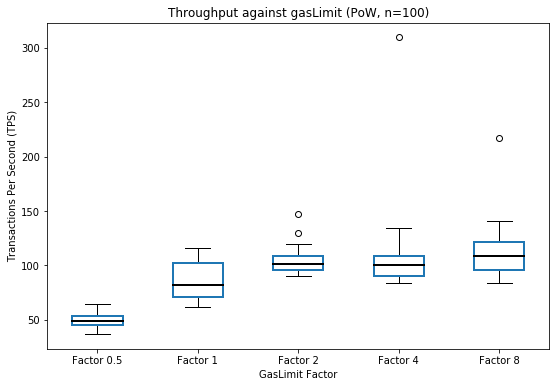

In [5]:
color_latency="#ff7f0e"
color_tps="#1f77b4"

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot
bp = ax.boxplot(data_to_plot,labels=objects, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color=color_tps, linewidth=2)
    # change fill color
    box.set( facecolor = 'w' )
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="k", linewidth=2) 

#fig.savefig("result_gasLimit_pow_throughput_boxplot.svg", format="svg")

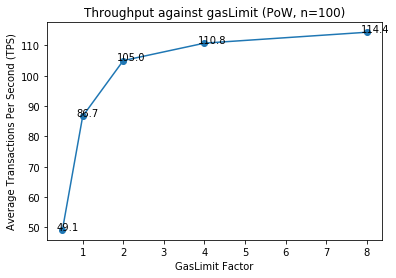

In [6]:
plt.plot(xvalues,means_tps, marker='o', color=color_tps)
plt.title(title)
plt.ylabel("Average Transactions Per Second (TPS)")
plt.xlabel(xlabel)
plot_annotate(plt,xvalues, means_tps)
#plt.savefig("result_gasLimit_pow_throughput_lines_average.svg", format="svg")
plt.show()

## Latency

In [7]:
data_latency = df[['averageDelay','usedGenesisJson']]
#print(data_latency)

title = "Latency against gasLimit (PoW, n=" + str(sample_size) + ")"
xlabel = "GasLimit Factor"
ylabel = "Transaction Latency [seconds]"

data_latency_1=data_latency.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_05.json"].iloc[:,0]
data_latency_2=data_latency.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_1.json"].iloc[:,0]
data_latency_3=data_latency.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_2.json"].iloc[:,0]
data_latency_4=data_latency.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_4.json"].iloc[:,0]
data_latency_5=data_latency.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_8.json"].iloc[:,0]

if(remove_outliers==True):
    data_latency_1=remove_outliers_iqr(data_latency_1)
    data_latency_2=remove_outliers_iqr(data_latency_2)
    data_latency_3=remove_outliers_iqr(data_latency_3)
    data_latency_4=remove_outliers_iqr(data_latency_4)
    data_latency_5=remove_outliers_iqr(data_latency_5)
    
## combine these different collections into a list    
data_to_plot = [data_latency_1,data_latency_2,data_latency_3,data_latency_4,data_latency_5]

avg1_latency = pd.Series(data_latency_1).mean()
avg2_latency = pd.Series(data_latency_2).mean()
avg3_latency = pd.Series(data_latency_3).mean()
avg4_latency = pd.Series(data_latency_4).mean()
avg5_latency = pd.Series(data_latency_5).mean()

means_latency = [avg1_latency, avg2_latency, avg3_latency, avg4_latency, avg5_latency]

med1_latency=pd.Series(data_latency_1).median()
med2_latency=pd.Series(data_latency_2).median()
med3_latency=pd.Series(data_latency_3).median()
med4_latency=pd.Series(data_latency_4).median()
med5_latency=pd.Series(data_latency_5).median()

print("\nAverages:\n")
print(avg1_latency)
print(avg2_latency)
print(avg3_latency)
print(avg4_latency)
print(avg5_latency)
#print(avg6_latency)

print("\nMedians:\n")
print(med1_latency)
print(med2_latency)
print(med3_latency)
print(med4_latency)
print(med5_latency)

print("\nStandard Deviations:\n")
print(np.std(data_latency_1))
print(np.std(data_latency_2))
print(np.std(data_latency_3))
print(np.std(data_latency_4))
print(np.std(data_latency_5))


Averages:

11.745278399999995
7.22218445
6.410358500000003
6.4214451499999985
5.9795764999999985

Medians:

11.255002500000007
6.740940500000001
6.744872
6.422086000000003
5.949390499999999

Standard Deviations:

2.3783799441420053
1.4734631245591945
1.2976242859960478
1.442543104827592
1.505494927883501


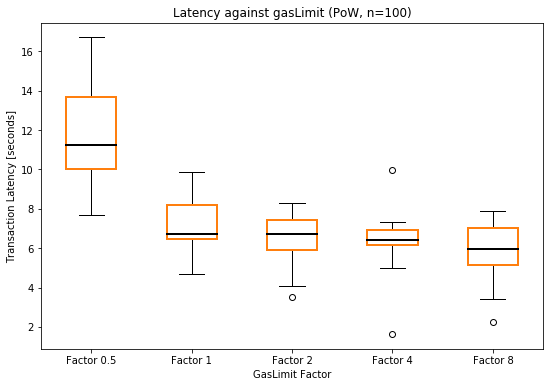

In [8]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot
bp = ax.boxplot(data_to_plot,labels=objects, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color=color_latency, linewidth=2)
    # change fill color
    box.set( facecolor = 'w' )
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="k", linewidth=2) 
    
#fig.savefig("result_gasLimit_pow_latency_boxplot.svg", format="svg")

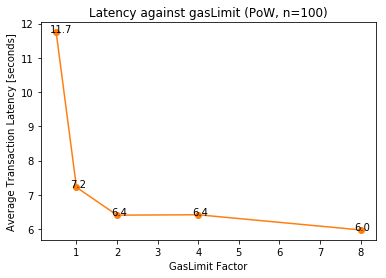

In [9]:
plt.plot(xvalues,means_latency, marker='o', color=color_latency)
plt.title(title)
plt.ylabel("Average Transaction Latency [seconds]")
plt.xlabel(xlabel)
plot_annotate(plt,xvalues, means_latency)
#plt.savefig("result_gasLimit_pow_latency_lines_average.svg", format="svg")
plt.show()

## Throughput and Latency Combined

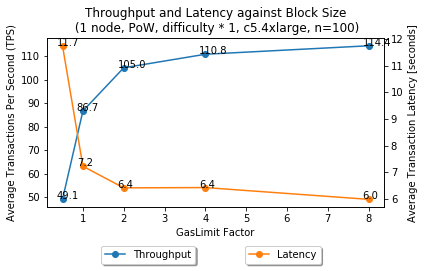

In [10]:
fig, ax1 = plt.subplots()
#fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.set_title("Throughput and Latency against Block Size\n (1 node, PoW, difficulty * 1, c5.4xlarge, n=" + str(sample_size) + ")")
ax1.set_xlabel(xlabel)

ax1.plot(xvalues, means_tps, marker='o', color=color_tps,label="Throughput")
ax1.set_ylabel("Average Transactions Per Second (TPS)")
ax1.tick_params(xlabel)
plot_annotate(ax1,xvalues, means_tps)

ax2 = ax1.twinx()
ax2.plot(xvalues, means_latency, marker='o', color=color_latency,label="Latency")
ax2.set_ylabel("Average Transaction Latency [seconds]")
plot_annotate(ax2,xvalues, means_latency)

ax1.legend(loc='upper center', bbox_to_anchor=(0.3, -0.2),
          ncol=3, fancybox=True, shadow=True)

ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.2),
          ncol=3, fancybox=True, shadow=True)

fig.tight_layout()
fig.savefig("result_gasLimit_pow_c54xlarge_1node_combined_lines.svg", format="svg")
plt.show()

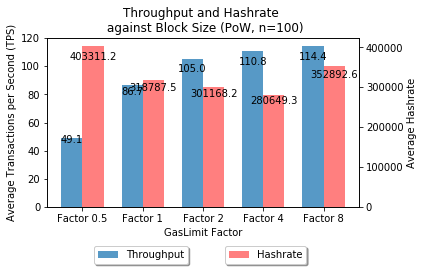

In [11]:
data_hashRate = df[['hashRate','usedGenesisJson']]

avg1_hashRate = data_hashRate.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_05.json"].iloc[:,0].mean()
avg2_hashRate = data_hashRate.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_1.json"].iloc[:,0].mean()
avg3_hashRate = data_hashRate.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_2.json"].iloc[:,0].mean()
avg4_hashRate = data_hashRate.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_4.json"].iloc[:,0].mean()
avg5_hashRate = data_hashRate.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_8.json"].iloc[:,0].mean()

means_hashRate = [avg1_hashRate, avg2_hashRate, avg3_hashRate, avg4_hashRate, avg5_hashRate]

fig = plt.figure()
ax1 = fig.add_subplot(111)

N = len(means_hashRate)
ind = np.arange(N) # the x locations for the groups
width = 0.35 # the width of the bars

## the bars
rects1 = ax1.bar(ind, means_tps, width, color=color_tps, alpha=0.75, label="Throughput")
ax1.set_ylabel("Average Transactions per Second (TPS)")
ax1.set_xlabel(xlabel)

ax2 = ax1.twinx()
rects2 = ax2.bar(ind+width, means_hashRate, width,color="r", alpha=0.5, label="Hashrate")
ax2.set_ylabel("Average Hashrate")

# axes and labels
#ax1.set_xlim(-width,len(ind)+width)
ax1.set_title("Throughput and Hashrate \n against Block Size (PoW, n=" + str(sample_size) + ")")
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(objects)

## add a legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.3, -0.2),
          ncol=3, fancybox=True, shadow=True)

ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.2),
          ncol=3, fancybox=True, shadow=True)

autolabel_barchart(rects1,ax1)
autolabel_barchart(rects2,ax2)

fig.tight_layout()
#ax1.figure.savefig("result_gasLimit_pow_tps_hashrate_combined_barchart.svg", format="svg",bbox_inches='tight')

plt.show()

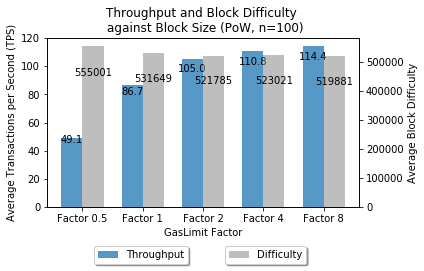

In [12]:
data_difficulty= df[['difficulty','usedGenesisJson']]

avg1_difficulty = data_difficulty.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_05.json"].iloc[:,0].mean()
avg2_difficulty = data_difficulty.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_1.json"].iloc[:,0].mean()
avg3_difficulty = data_difficulty.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_2.json"].iloc[:,0].mean()
avg4_difficulty = data_difficulty.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_4.json"].iloc[:,0].mean()
avg5_difficulty = data_difficulty.loc[df['usedGenesisJson'] == "genesis_pow_gasLimit_8.json"].iloc[:,0].mean()

means_difficulty = [avg1_difficulty, avg2_difficulty, avg3_difficulty, avg4_difficulty, avg5_difficulty]

fig = plt.figure()
ax1 = fig.add_subplot(111)

N = len(means_hashRate)
ind = np.arange(N) # the x locations for the groups
width = 0.35 # the width of the bars

## the bars
rects1 = ax1.bar(ind, means_tps, width, color=color_tps, alpha=0.75, label="Throughput")
ax1.set_ylabel("Average Transactions per Second (TPS)")
ax1.set_xlabel(xlabel)

ax2 = ax1.twinx()
rects2 = ax2.bar(ind+width, means_difficulty, width,color="#7f7f7f", alpha=0.5, label="Difficulty")
ax2.set_ylabel("Average Block Difficulty")

# axes and labels
#ax1.set_xlim(-width,len(ind)+width)
ax1.set_title("Throughput and Block Difficulty \n against Block Size (PoW, n=" + str(sample_size) + ")")
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(objects)

## add a legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.3, -0.2),
          ncol=3, fancybox=True, shadow=True)

ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.2),
          ncol=3, fancybox=True, shadow=True)

autolabel_barchart(rects1,ax1)
autolabel_barchart_2(rects2,ax2)

fig.tight_layout()
#ax1.figure.savefig("result_gasLimit_pow_tps_difficulty_combined_barchart.svg", format="svg",bbox_inches='tight')

plt.show()

# Block Frequency Analysis

In [13]:
f05_timestamp_block_50=1545155947
f05_timestamp_block_250=1545156208
f05_timestamp_block_350=1545156350
print("Factor 0.5 Average Timestamp: " + str((f05_timestamp_block_250-f05_timestamp_block_50)/200))

f05_timestamp_block_50=0
f05_timestamp_block_250=0
f05_timestamp_block_350=0
print("Factor 0.5 Average Timestamp: " + str((f05_timestamp_block_250_2-f05_timestamp_block_50_2)/200))

f1_timestamp_block_50=1545156518
f1_timestamp_block_250=1545156769
print("Factor 1 Average Timestamp: " + str((f1_timestamp_block_250-f1_timestamp_block_50)/200))

f2_timestamp_block_50=1545156872
f2_timestamp_block_150=1545157016
print("Factor 2 Average Timestamp: " + str((f2_timestamp_block_150-f2_timestamp_block_50)/100))

f4_timestamp_block_50=1545157155
f4_timestamp_block_150=1545157301
print("Factor 4 Average Timestamp: " + str((f4_timestamp_block_150-f4_timestamp_block_50)/100))

f8_timestamp_block_50=1545157438
f8_timestamp_block_150=1545157600
f8_timestamp_block_250=1545157712
print("Factor 8 Average Timestamp: " + str((f8_timestamp_block_250-f8_timestamp_block_50)/200))

f8_timestamp_block_50_2=1545234359
f8_timestamp_block_250_2=1545234668
print("Factor 8 Average Timestamp: " + str((f8_timestamp_block_250_2-f8_timestamp_block_50_2)/200))

Factor 0.5 Average Timestamp: 1.305


NameError: name 'f05_timestamp_block_250_2' is not defined